In [29]:
import pandas as pd
import matplotlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df = pd.read_excel('oasis_longitudinal_demographics.xlsx')
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1986.550000,0.696106,0.883440
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004.479526,0.681062,0.875539
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678.290000,0.736336,1.045710
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1737.620000,0.713402,1.010000
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1697.911134,0.701236,1.033623


In [31]:
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.121584,0.729556,1.195460
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.135956,0.037141,0.138105
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1105.652499,0.644399,0.875539
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.330000,0.700191,1.098979
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.041312,0.728789,1.193844
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1596.936793,0.755669,1.292980
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.479526,0.836842,1.587298


In [32]:
df.shape

(373, 15)

In [33]:
print(df.dtypes)

Subject ID     object
MRI ID         object
Group          object
Visit           int64
MR Delay        int64
M/F            object
Hand           object
Age             int64
EDUC            int64
SES           float64
MMSE          float64
CDR           float64
eTIV          float64
nWBV          float64
ASF           float64
dtype: object


In [34]:
na_counts = df.isnull().sum()
print(na_counts)

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64


In [35]:
df.dropna(subset=['SES','MMSE'], inplace=True)
na_counts = df.isnull().sum()
print(na_counts)

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64


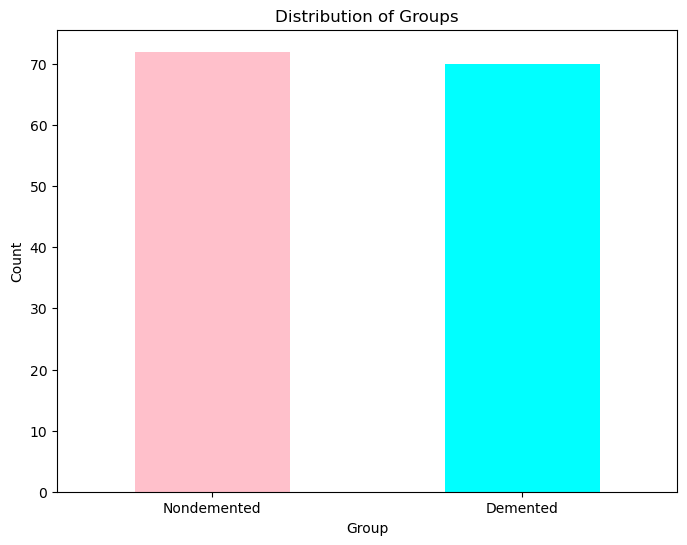

In [36]:
df = df.loc[df['Visit']==1] # use first visit data only because of the analysis we're doing
df = df.reset_index(drop=True) # reset index after filtering first visit data
df['Group'] = df['Group'].replace(['Converted'], ['Demented'])

group_counts = df['Group'].value_counts()

# Create a bar graph
plt.figure(figsize=(8, 6))
group_counts.plot(kind='bar', color=['pink', 'cyan'])
plt.title('Distribution of Groups')
plt.xlabel('Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

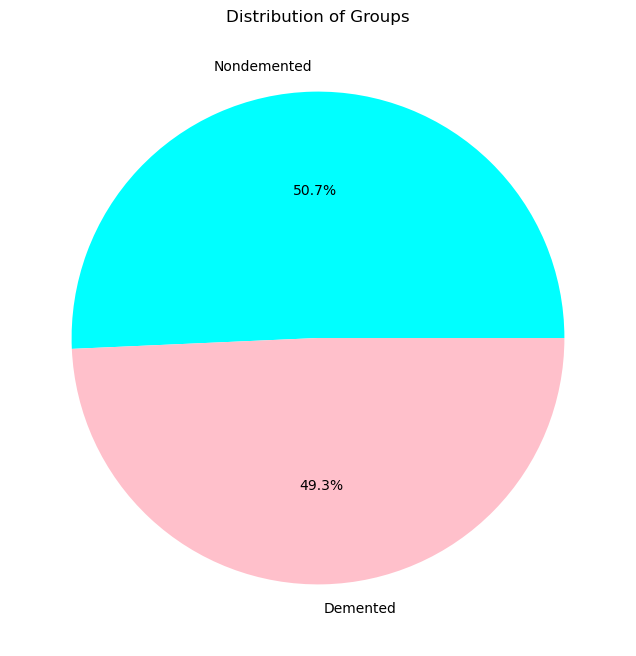

In [37]:
# Create a pie chart
plt.figure(figsize=(8, 8))
group_counts.plot(kind='pie', autopct='%1.1f%%', colors=['cyan', 'pink'])
plt.title('Distribution of Groups')
plt.ylabel('')
plt.show()

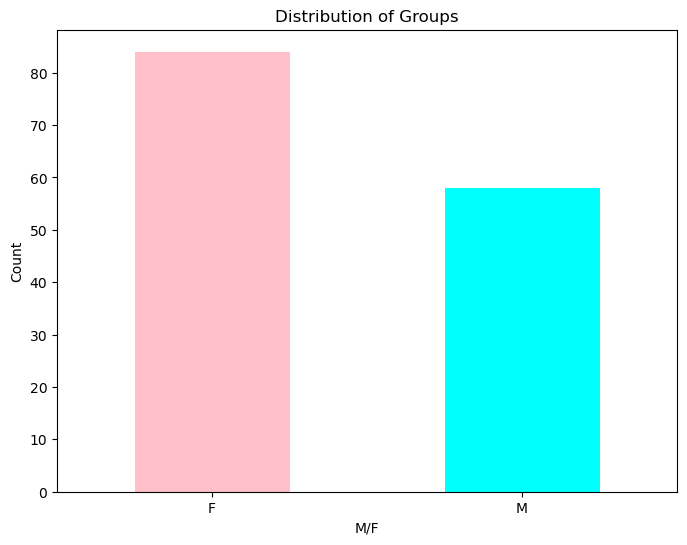

In [38]:
group_counts = df['M/F'].value_counts()

# Create a bar graph
plt.figure(figsize=(8, 6))
group_counts.plot(kind='bar', color=['pink', 'cyan'])
plt.title('Distribution of Groups')
plt.xlabel('M/F')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

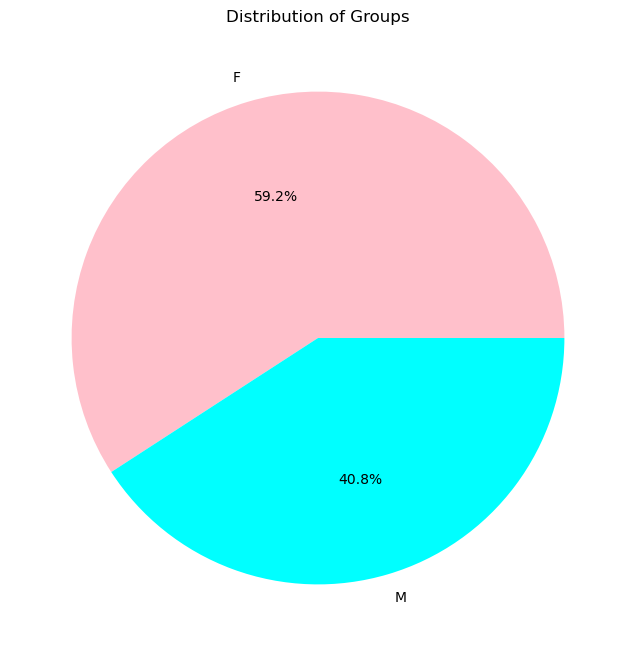

In [39]:
plt.figure(figsize=(8, 8))
group_counts.plot(kind='pie', autopct='%1.1f%%', colors=['pink', 'cyan'])
plt.title('Distribution of Groups')
plt.ylabel('')
plt.show()

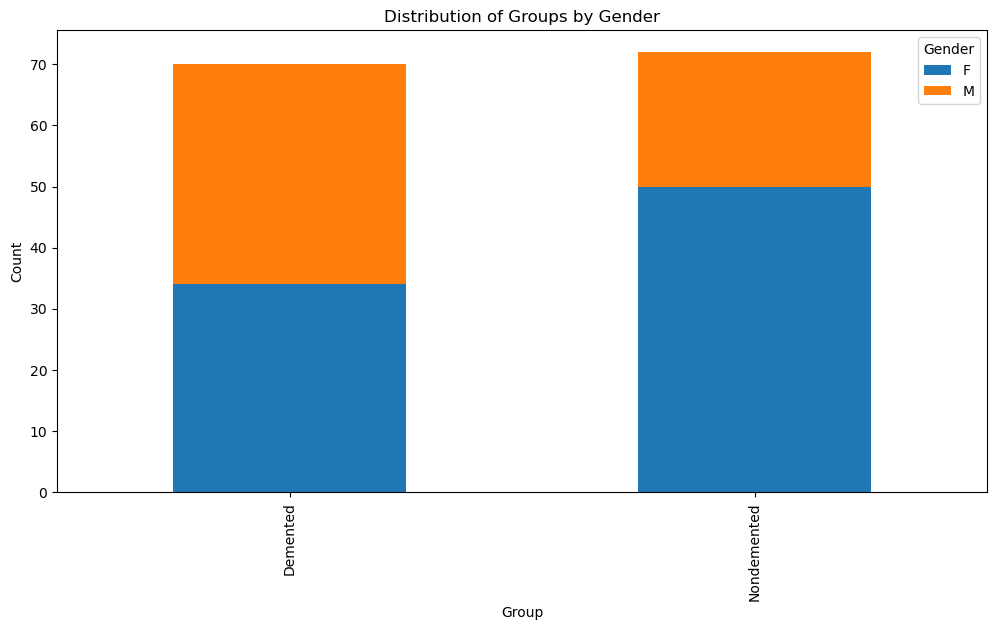

In [40]:
group_gender_counts = df.groupby(['Group', 'M/F']).size().unstack(fill_value=0)

# Create a multi-level pie chart
ax = group_gender_counts.plot(kind='bar', stacked=True, figsize=(12, 6))

# Set labels and title
ax.set_xlabel('Group')
ax.set_ylabel('Count')
plt.title('Distribution of Groups by Gender')

# Display the legend
plt.legend(title='Gender', loc='upper right')

plt.show()

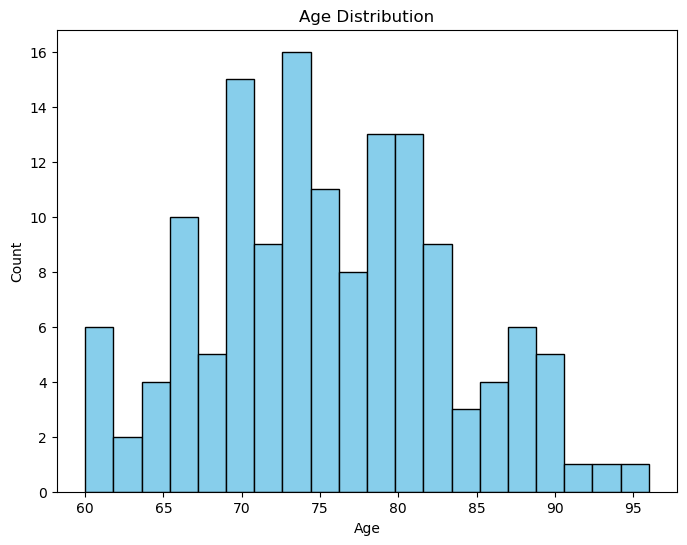

In [41]:
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

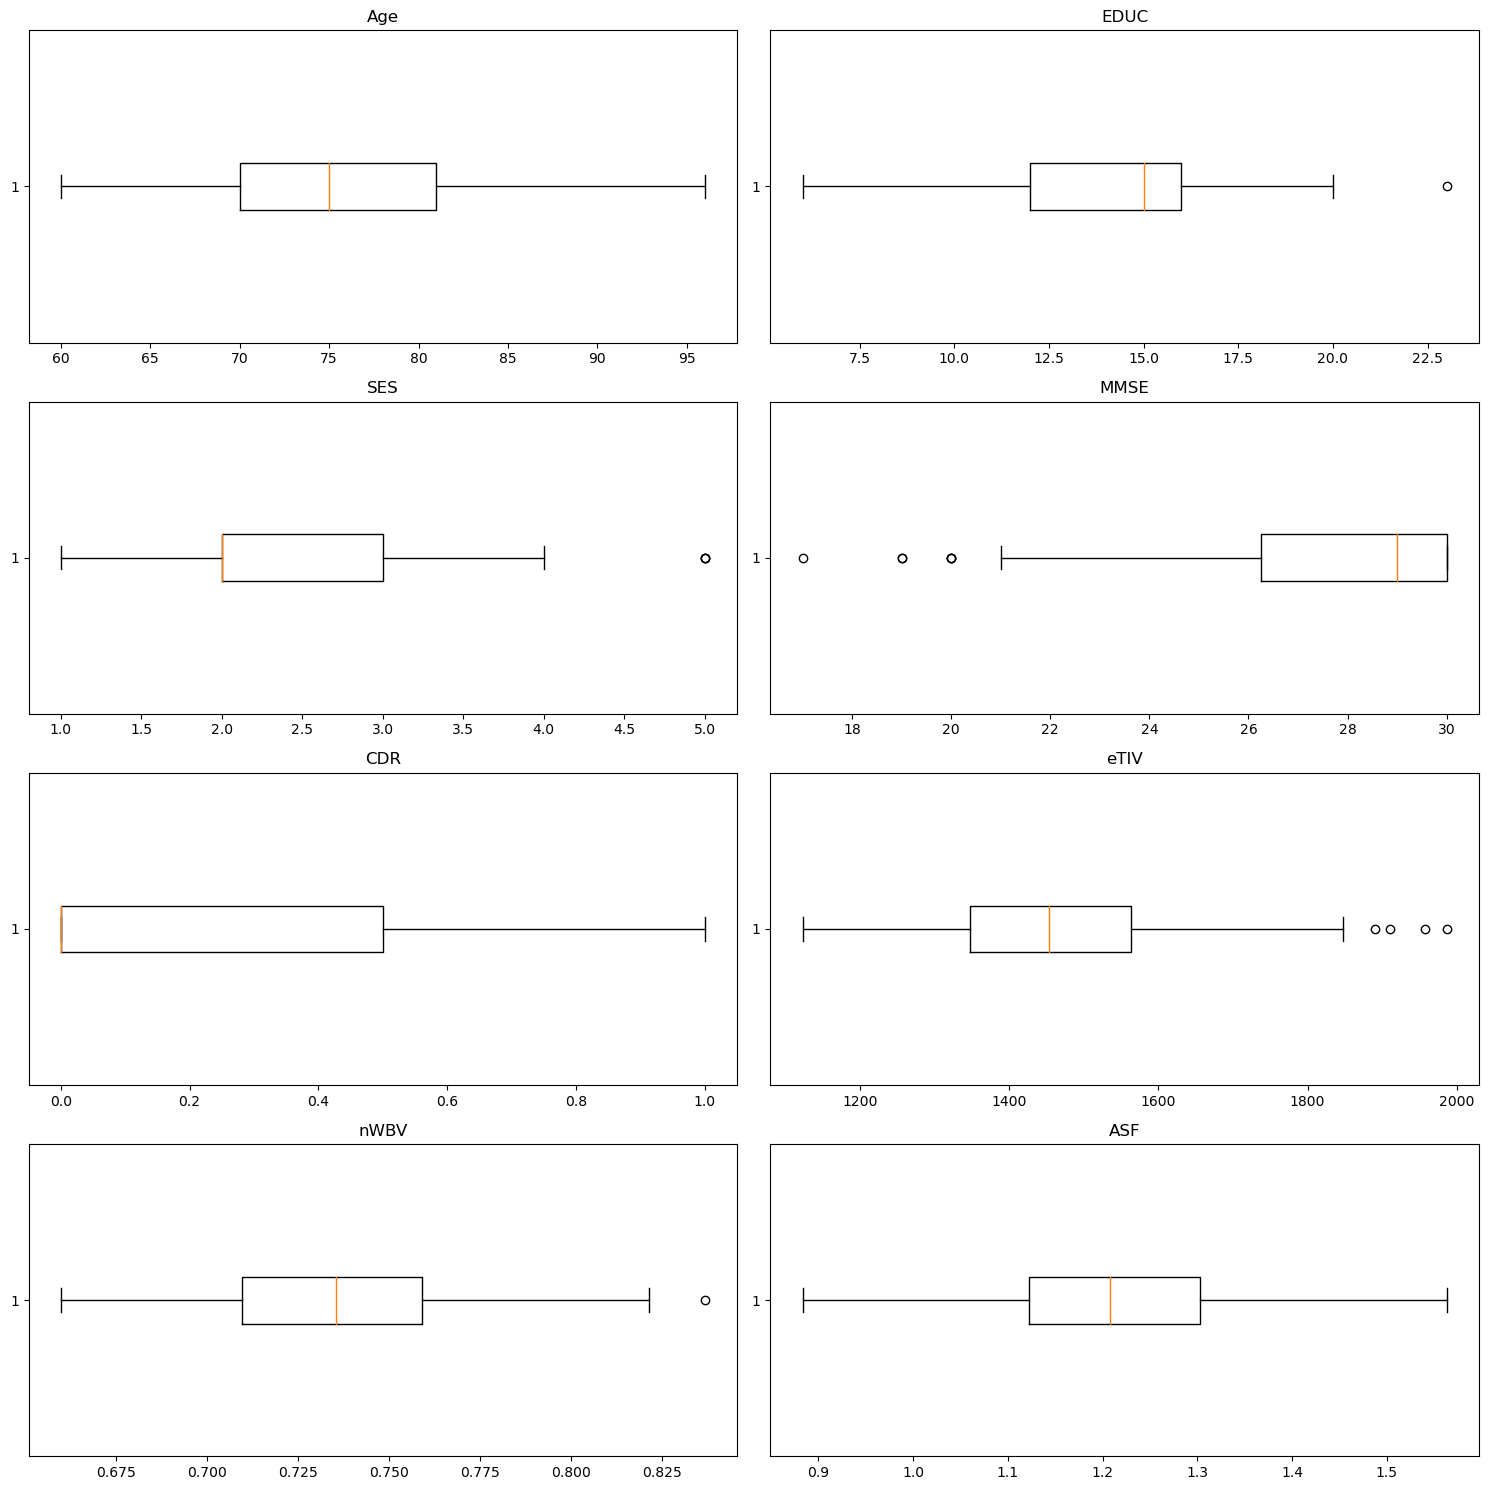

In [42]:
columns_to_boxplot = ['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']

# Create subplots in a 2 by 4 grid
fig, axes = plt.subplots(4, 2, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.ravel()

for i, column in enumerate(columns_to_boxplot):
    # Create a boxplot for each column
    axes[i].boxplot(df[column], vert=False)
    axes[i].set_title(column)

# Remove empty subplots
for i in range(len(columns_to_boxplot), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

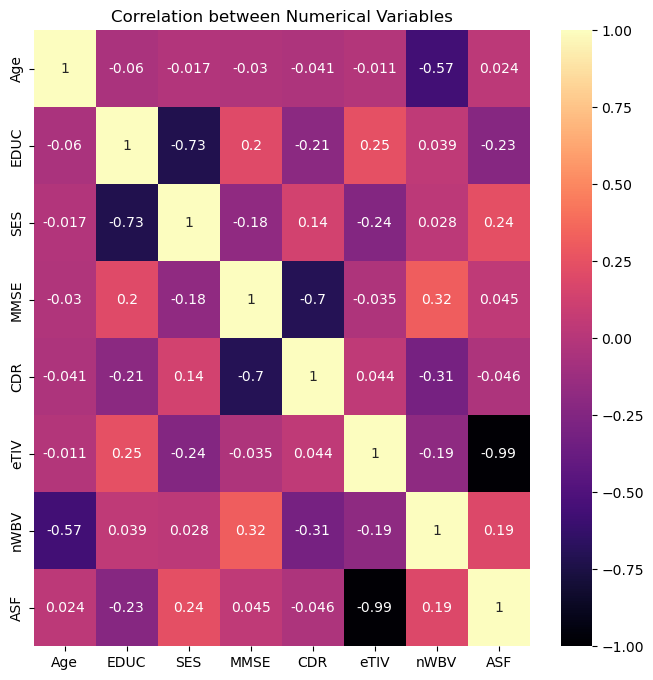

In [43]:
correlation_matrix = df[['Age','EDUC','SES','MMSE','CDR','eTIV','nWBV','ASF']].corr()

# display the correlation coefficients in heatmap
plt.figure(figsize=(8,8))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True,cmap='magma')
plt.title('Correlation between Numerical Variables')
plt.show()

Text(0.5, 1.0, 'MMSE vs Dementia')

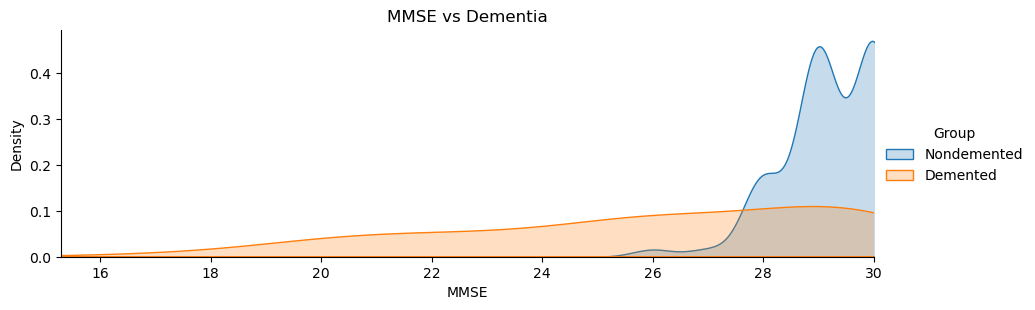

In [44]:
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'MMSE',shade= True)
facet.set(xlim=(0, df['MMSE'].max()))
facet.add_legend()
plt.xlim(15.30)
plt.title('MMSE vs Dementia')

Text(0.5, 1.0, 'nWBV vs Dementia')

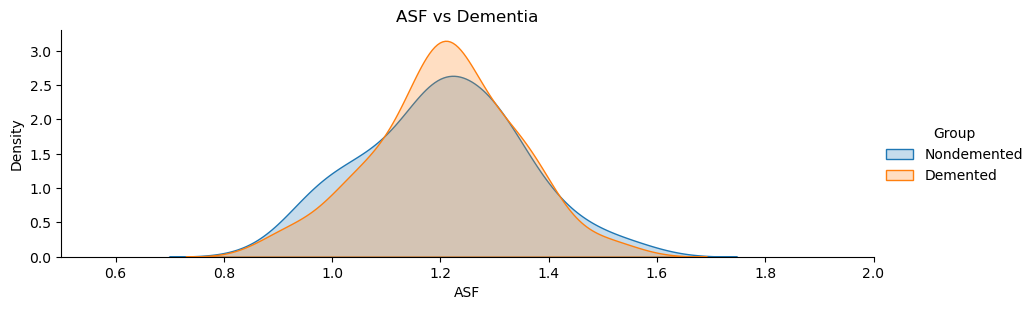

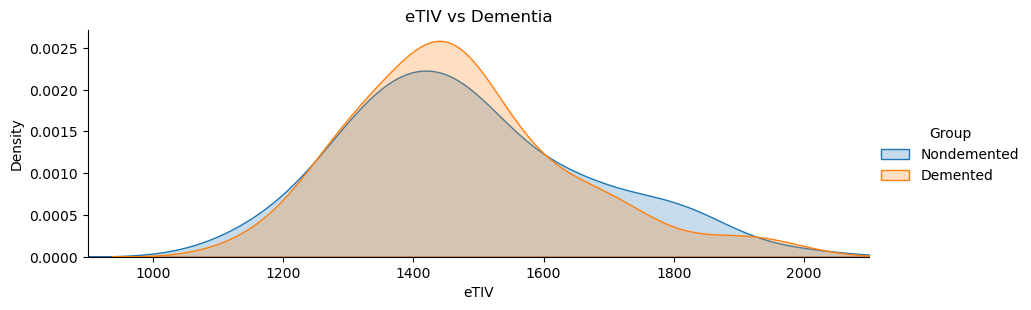

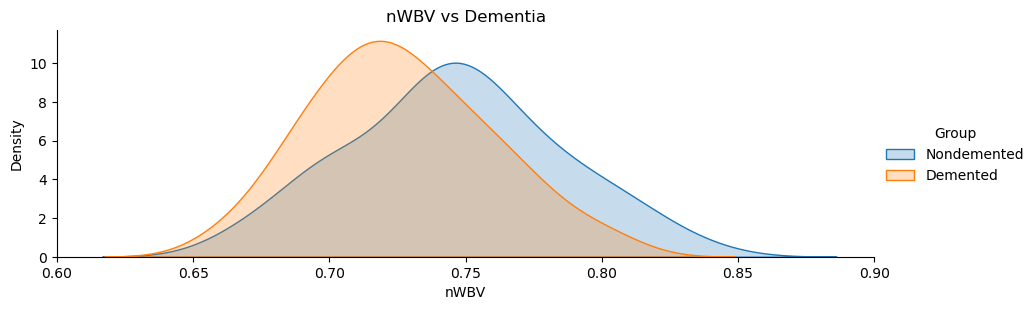

In [45]:
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'ASF',shade= True)
facet.set(xlim=(0, df['ASF'].max()))
facet.add_legend()
plt.xlim(0.5, 2)
plt.title('ASF vs Dementia')

#eTIV = Estimated Total Intracranial Volume
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'eTIV',shade= True)
facet.set(xlim=(0, df['eTIV'].max()))
facet.add_legend()
plt.xlim(900, 2100)
plt.title('eTIV vs Dementia')

#'nWBV' = Normalized Whole Brain Volume

facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'nWBV',shade= True)
facet.set(xlim=(0, df['nWBV'].max()))
facet.add_legend()
plt.xlim(0.6,0.9)
plt.title('nWBV vs Dementia')

Text(0.5, 1.0, 'EDUC vs Dementia')

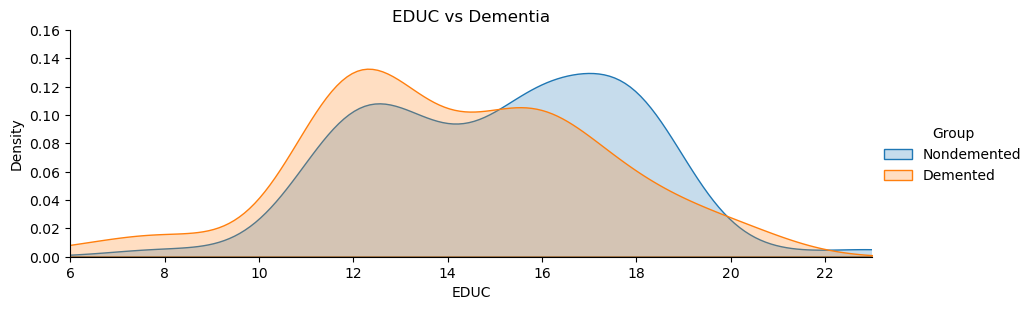

In [46]:
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'EDUC',shade= True)
facet.set(xlim=(df['EDUC'].min(), df['EDUC'].max()))
facet.add_legend()
plt.ylim(0, 0.16)
plt.title('EDUC vs Dementia')

In [47]:
age_bins = [60, 65, 70, 75, 80, 85, 90, 95, 100]
age_labels = ['60-65', '66-70', '71-75', '76-80', '81-85', '86-90', '91-95', '96-100']

# Create a new column 'AgeGroup' based on the defined bins and labels
df_agegroup = df.copy()
df_agegroup['AgeGroup'] = pd.cut(df_agegroup['Age'], bins=age_bins, labels=age_labels, right=False)



In [48]:
#print(contingency_table)

NameError: name 'contingency_table' is not defined

In [49]:
print(df_agegroup)

    Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
0    OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87   
1    OAS2_0004  OAS2_0004_MR1  Nondemented      1         0   F    R   88   
2    OAS2_0005  OAS2_0005_MR1  Nondemented      1         0   M    R   80   
3    OAS2_0008  OAS2_0008_MR1  Nondemented      1         0   F    R   93   
4    OAS2_0009  OAS2_0009_MR1     Demented      1         0   M    R   68   
..         ...            ...          ...    ...       ...  ..  ...  ...   
137  OAS2_0179  OAS2_0179_MR1     Demented      1         0   M    R   79   
138  OAS2_0183  OAS2_0183_MR1  Nondemented      1         0   F    R   66   
139  OAS2_0184  OAS2_0184_MR1     Demented      1         0   F    R   72   
140  OAS2_0185  OAS2_0185_MR1     Demented      1         0   M    R   80   
141  OAS2_0186  OAS2_0186_MR1  Nondemented      1         0   F    R   61   

     EDUC  SES  MMSE  CDR     eTIV      nWBV      ASF AgeGroup  
0      14 

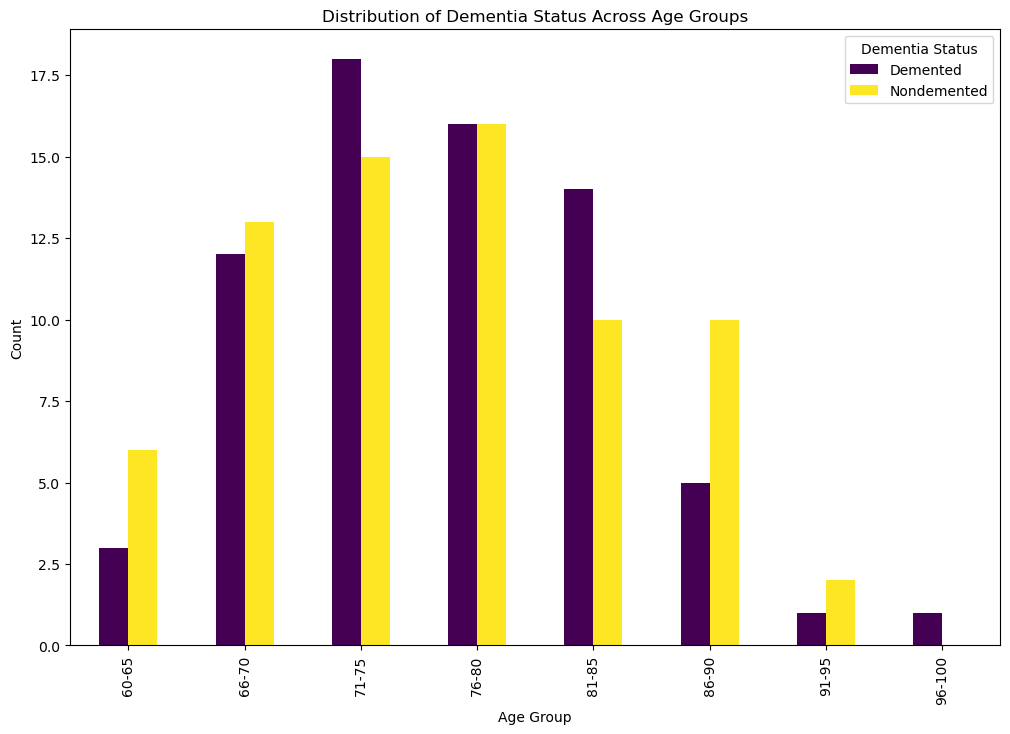

In [50]:
grouped_data = df_agegroup.groupby(['AgeGroup', 'Group']).size().unstack(fill_value=0)

# Plot the grouped bar graph
grouped_data.plot(kind='bar', stacked=False, figsize=(12, 8), colormap='viridis')


# Set labels and title
plt.title('Distribution of Dementia Status Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Display legend
plt.legend(title='Dementia Status')

plt.show()

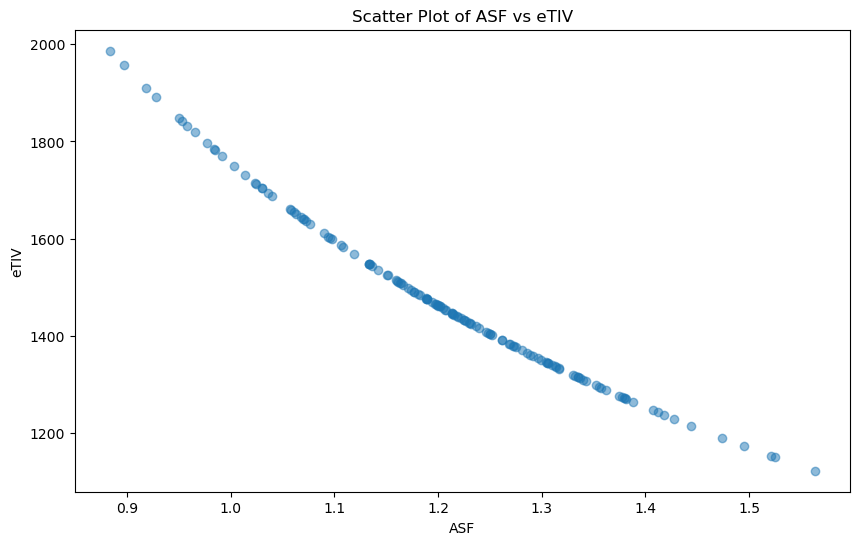

In [51]:
plt.figure(figsize=(10, 6))
plt.scatter(df['ASF'], df['eTIV'], alpha=0.5)

# Set labels and title
plt.title(f'Scatter Plot of ASF vs eTIV')
plt.xlabel('ASF')
plt.ylabel('eTIV')

# Show the plot
plt.show()

Text(0, 0.5, 'Count')

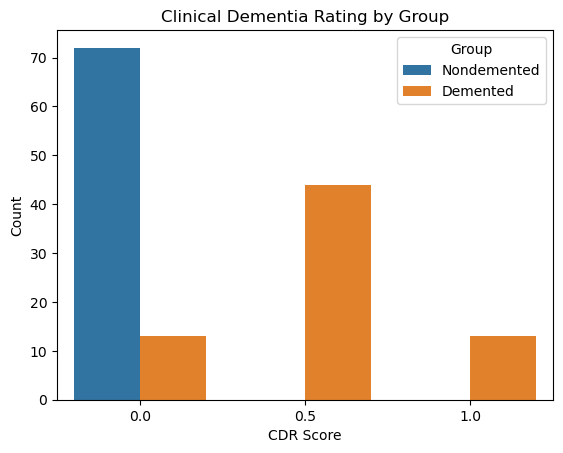

In [63]:
sns.countplot(data=df, x="CDR", hue="Group")

plt.title('Clinical Dementia Rating by Group')
plt.xlabel('CDR Score')
plt.ylabel('Count')